In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
from sklearn.metrics import *

In [2]:
df=pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

In [3]:
df.sample(3)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
73480,1.237662e+18,223.770513,7.846273,18.84796,17.65935,17.22901,16.89396,16.72579,3909,301,4,189,2.042398e+18,GALAXY,0.101989,1814,54555,55
35483,1.237679e+18,356.171004,12.927257,21.07027,20.05490,19.70586,19.54391,19.47384,7787,301,5,177,6.924495e+18,STAR,-0.000627,6150,56187,766
95881,1.237667e+18,124.425846,64.966478,19.57924,19.43773,19.27868,19.17588,19.03266,5060,301,1,186,3.699731e+18,QSO,2.094377,3286,54910,85


In [4]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [6]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [7]:
X=df.drop(columns=["class"])
one_hot=OneHotEncoder(sparse_output=False)
Y=one_hot.fit_transform(df[["class"]])


In [8]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
random_classif=RandomForestClassifier()
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

0.97825

In [11]:
y_pred=random_classif.predict(X_test)

In [12]:
Y_test

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
y_pred

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

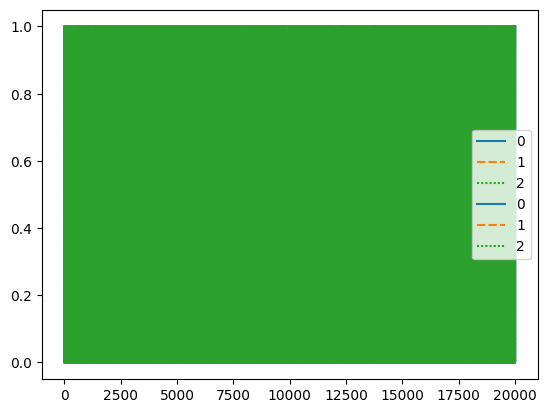

In [14]:
sns.lineplot(Y_test)
sns.lineplot(y_pred,color="red")

<Axes: >

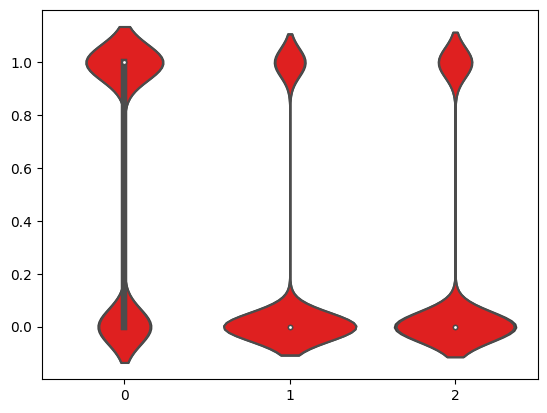

In [15]:
sns.violinplot(Y_test)
sns.violinplot(y_pred,color="red")

<Axes: >

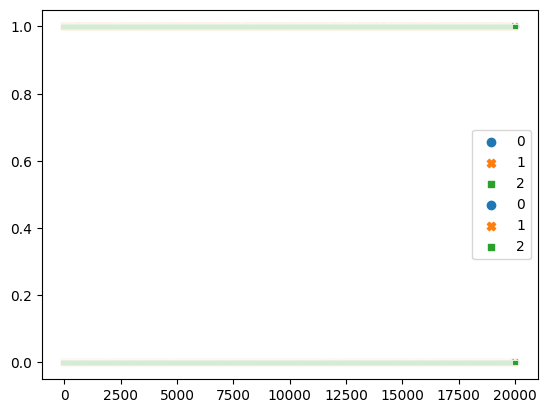

In [16]:
sns.scatterplot(Y_test,color="purple")
sns.scatterplot(y_pred,color="red")

In [17]:
value,counts=np.unique(Y_test,return_counts=True)
counts
value

array([0., 1.])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: ylabel='Density'>

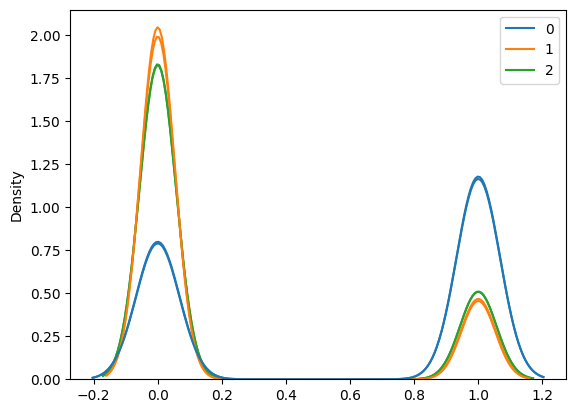

In [18]:
sns.kdeplot(Y_test)
sns.kdeplot(y_pred)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: ylabel='Count'>

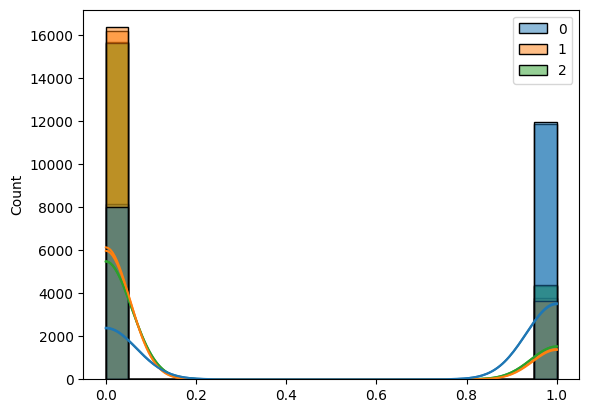

In [19]:
sns.histplot(Y_test,kde="True")
sns.histplot(y_pred,color="red",kde="True")

In [33]:
print("accracy:",accuracy_score(Y_test,y_pred))

accracy: 0.97825


In [28]:
for i in [( precision_score),( recall_score), (f1_score)]:
    print(f"{i}:",i(Y_test,y_pred,average='weighted'))
    

<function precision_score at 0x7b05f44fcc10>: 0.979124077424116
<function recall_score at 0x7b05f44fcca0>: 0.97825
<function f1_score at 0x7b05f44fc820>: 0.9785896327106002


In [34]:
print("roc_auc_score:",roc_auc_score(Y_test,y_pred,multi_class='ovr'))

roc_auc_score: 0.9784937142369431
